In [33]:
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

In [34]:
(x_train,_),(x_test,_) = mnist.load_data()

In [35]:
inp_img = Input(shape=(784,)) #input placeholder
encoded = Dense(32,activation="relu")(inp_img)   # encoded representation of the input
decoded = Dense(784,activation="sigmoid")(encoded) # lossy reconstruction of the input

In [36]:
# this model maps an input to its reconstruction
auto_encoder = Model(inp_img,decoded)

auto_encoder.compile(optimizer="adam",loss="binary_crossentropy")
auto_encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [37]:
# normalize all values between 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# change size (reshape) images from 28x28 to 784 borders   (60000,28,28) => (60000,784)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    # Equals to:             60000     , 784
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [38]:
auto_encoder.fit(x_train,x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test,x_test))
               # input,  output,  steps, how many to give each time          

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2767 - val_loss: 0.1885
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1704 - val_loss: 0.1533
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1445 - val_loss: 0.1341
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1291 - val_loss: 0.1216
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1186 - val_loss: 0.1132
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1115 - val_loss: 0.1074
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1065 - val_loss: 0.1030
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1027 - val_loss: 0.0999
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0999 - val_loss: 0.0975
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0978 - val_loss: 0.0958

313/313 [==============================] - 0s 994us/step


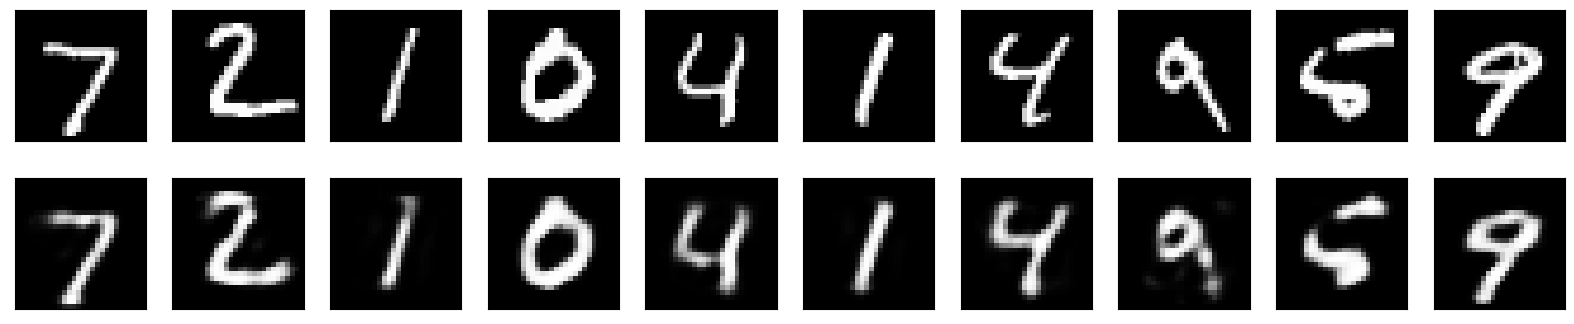

In [39]:
decoded_imgs = auto_encoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()